In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/thedhruvish/dataset-machine-learning/refs/heads/main/ml-algorithms-project/Vehicle.csv")

In [13]:
X = df.drop(columns=["Class"])
y_true = df["Class"]

In [14]:
df.isnull().sum()

Comp            0
Circ            0
D.Circ          0
Rad.Ra          0
Pr.Axis.Ra      0
Max.L.Ra        0
Scat.Ra         0
Elong           0
Pr.Axis.Rect    0
Max.L.Rect      0
Sc.Var.Maxis    0
Sc.Var.maxis    0
Ra.Gyr          0
Skew.Maxis      0
Skew.maxis      0
Kurt.maxis      0
Kurt.Maxis      0
Holl.Ra         0
Class           0
dtype: int64

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
n_clusters = y_true.nunique()
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

In [17]:
ari_score = adjusted_rand_score(y_true, y_kmeans)


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

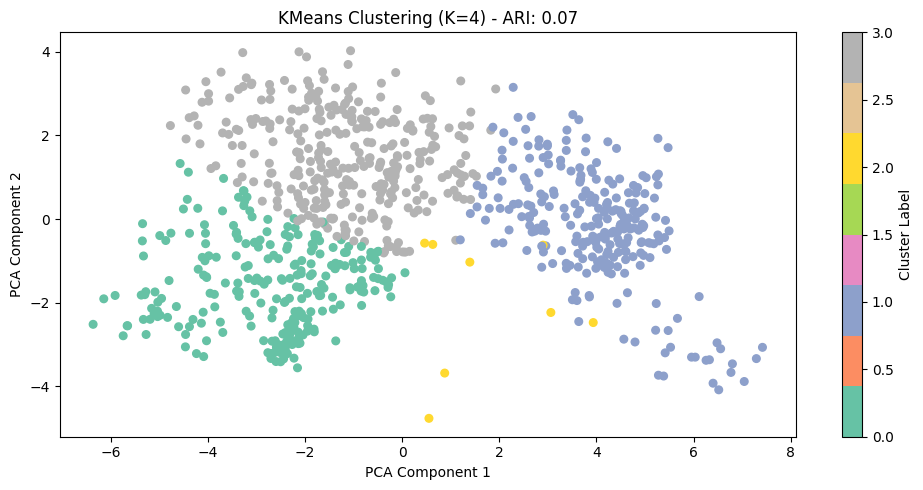

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap="Set2", s=30)
plt.title(f"KMeans Clustering (K={n_clusters}) - ARI: {ari_score:.2f}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.tight_layout()
plt.show()
